## Lab_1 利用 pandas 計算 投資組合報酬率：


In [1]:

import ffn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
          "figure.autolayout": True,
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'lines.linewidth': 2}

plt.rcParams.update(params)
%matplotlib inline

In [2]:
tickers = ['meta', 'aapl', 'amzn', 'nflx', 'googl']                         # Target stocks
start_date = datetime.datetime.now() - datetime.timedelta(days =557)        # 2022/01/01 ~ 2023/07/12
table = ffn.get(tickers, start = start_date)
print(table)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  meta        aapl        amzn        nflx       googl
Date                                                                  
2022-02-07  224.910004  170.160919  157.935501  402.100006  139.201004
2022-02-08  220.179993  173.303253  161.413498  403.529999  139.399002
2022-02-09  232.000000  174.740585  161.189499  412.890015  141.591995
2022-02-10  228.070007  170.616898  159.003494  406.269989  138.619995
2022-02-11  219.550003  167.167297  153.293503  391.309998  134.282501
...                ...         ...         ...         ...         ...
2023-08-08  312.640015  179.557526  139.940002  438.299988  131.399994
2023-08-09  305.

                meta      aapl      amzn      nflx     googl  My position
Date                                                                     
2022-02-07  1.000000  1.000000  1.000000  1.000000  1.000000     4.000000
2022-02-08  0.978969  1.018467  1.022022  1.003556  1.001422     4.045467
2022-02-09  1.031524  1.026914  1.020603  1.026834  1.017177     4.091528
2022-02-10  1.014050  1.002680  1.006762  1.010371  0.995826     4.015639
2022-02-11  0.976168  0.982407  0.970608  0.973166  0.964666     3.890847
...              ...       ...       ...       ...       ...          ...
2023-08-08  1.390067  1.055222  0.886058  1.090027  0.943959     3.975266
2023-08-09  1.357032  1.045773  0.872825  1.066650  0.931459     3.916707
2023-08-10  1.359388  1.044482  0.877320  1.069336  0.931674     3.922812
2023-08-11  1.341159  1.044834  0.876370  1.048645  0.930740     3.900590
2023-08-14  1.361389  1.054649  0.890047  1.063865  0.943456     3.952016

[381 rows x 6 columns]
Axes(0.125,0.2

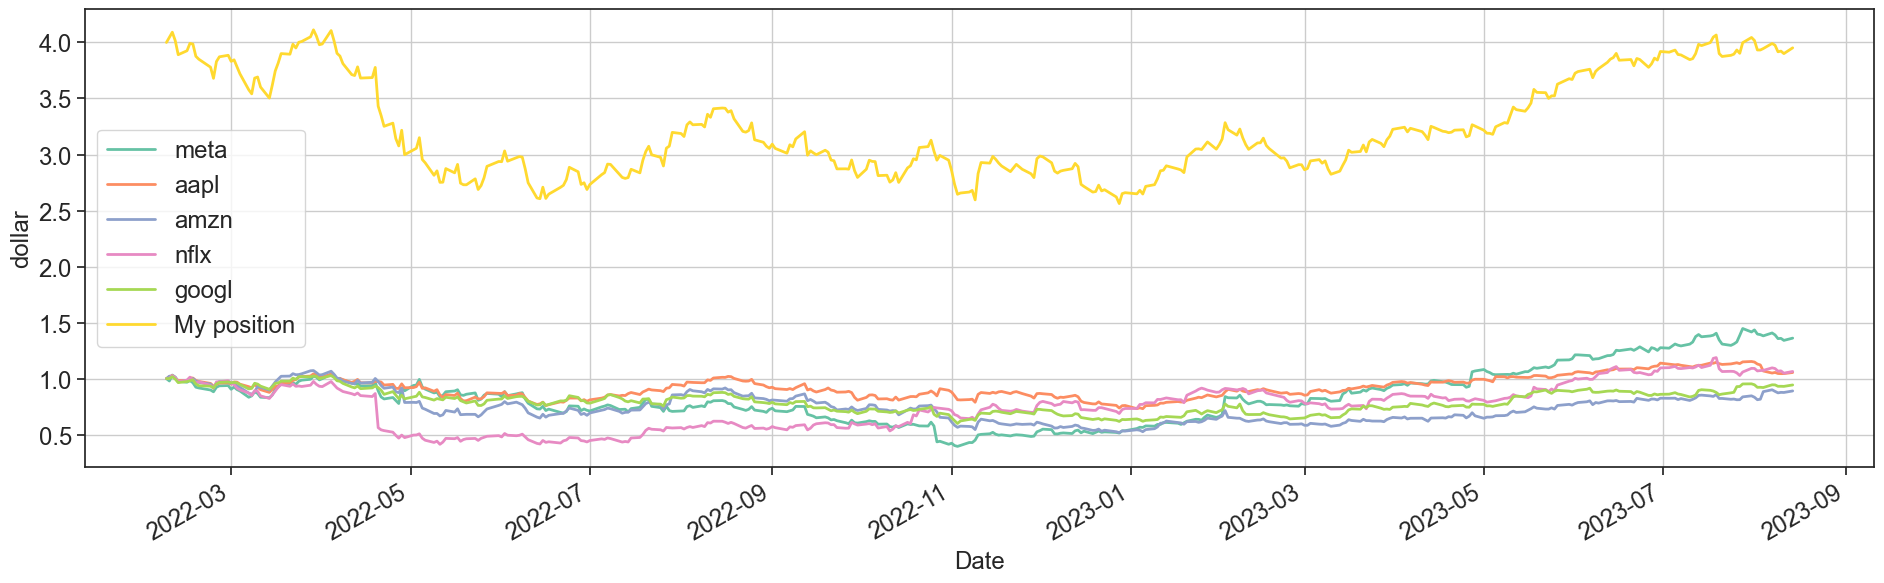

In [3]:
table = (table.rebase() / 100) * 1                                  # Use the exchange rate * 1 dollar = current value. 
table['My position'] = table.iloc[:, 1:6].sum(axis = 1)             # Use 'iloc' to select asset(dollar) of meta -> googl ans then sum.
rebased_fig = table.plot.line(grid = True, figsize = (19, 6))
rebased_fig.set_ylabel('dollar')
print(table)
print(rebased_fig)

Axes(0.125,0.2;0.775x0.68)


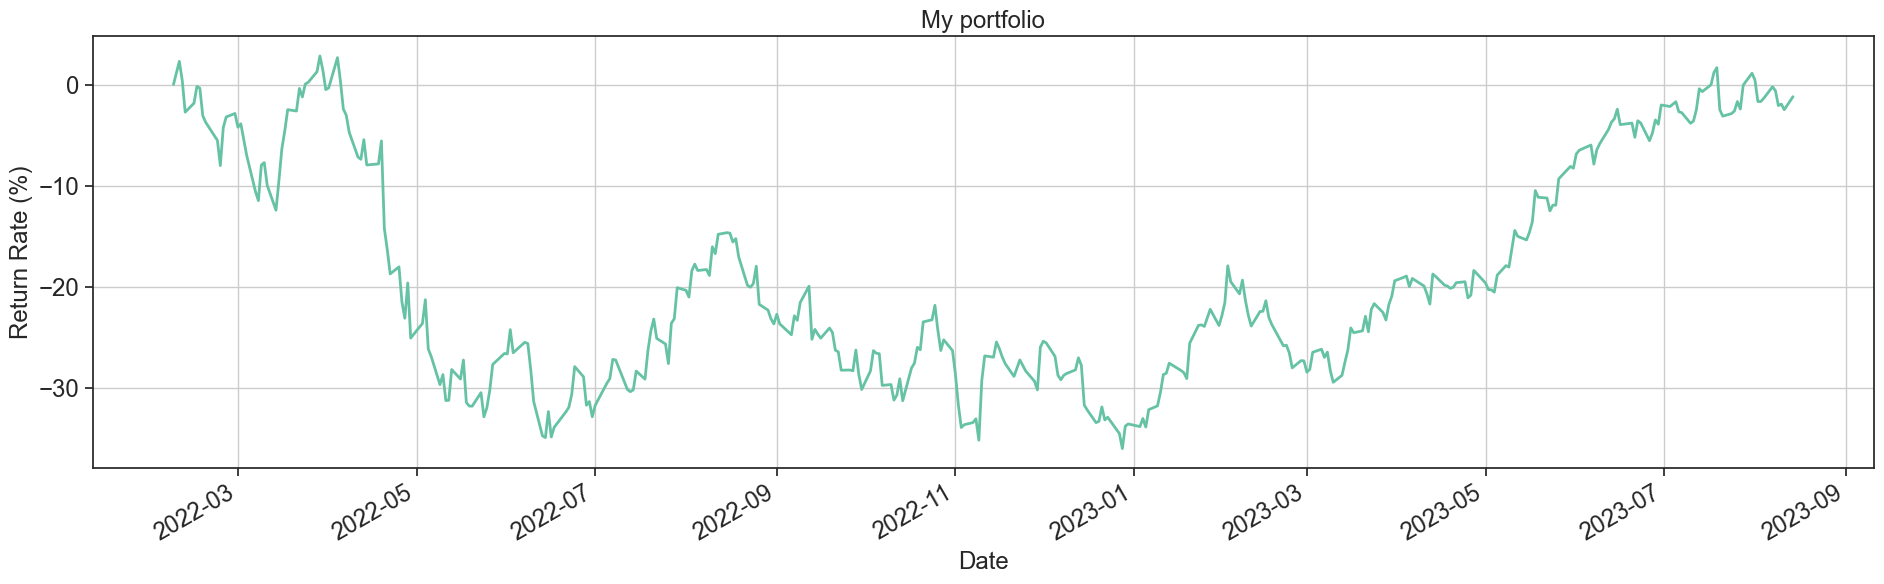

In [4]:
return_rate = table['My position'].rebase() - 100 
return_rate_fig = return_rate.plot.line(grid = True, figsize = (19, 6))
return_rate_fig.set_ylabel("Return Rate (%)")
return_rate_fig.set_title("My portfolio")
print(return_rate_fig)